### 梯度消失和梯度爆炸:
    当神经网络的层数较多时，模型的数值稳定性容易变差
    
    梯度爆炸（gradient exploding）： 参数更新过大，破坏了模型的稳定收敛
    梯度消失（gradient vanishing）： 参数更新过小，在每次更新时几乎不会移动，导致模型无法学习

#### 梯度消失:
    sigmoid函数，类似于阈值函数，但是，当sigmoid函数的输入很大或是很小时，它的梯度都会消失

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

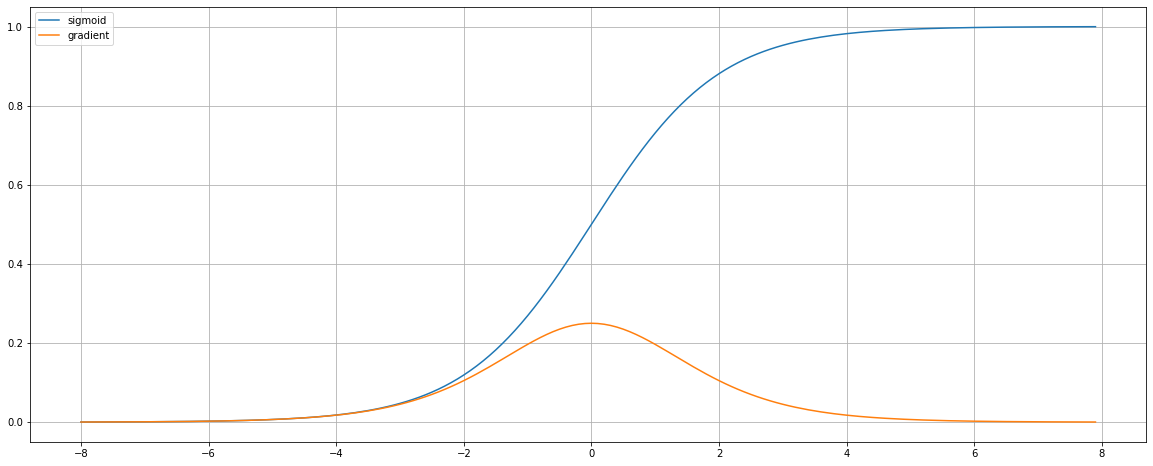

In [6]:
x = torch.arange(-8,8,0.1,requires_grad=True)
y = torch.sigmoid(x)

y.backward(torch.ones_like(x))

plt.figure(figsize=(20,8))
plt.plot(x.detach().numpy(),y.detach().numpy(),label='sigmoid')
plt.plot(x.detach().numpy(),x.grad.numpy(),label='gradient')
plt.legend()
plt.grid()
plt.show()
# 当sigmoid函数的输入很大或是很小时，它的梯度都会消失

#### 梯度爆炸:
    生成100个高斯随机矩阵，并将它们与某个初始矩阵相乘。 这时，矩阵乘积发生爆炸

In [7]:
M = torch.normal(0,1,size=(4,4))
print('一个矩阵：\n',M)

for _ in range(100):
    M = torch.mm(M,torch.normal(0,1,size=(4,4)))
    
print('乘以100矩阵后:\n',M)

一个矩阵：
 tensor([[-0.1600, -0.0724,  0.8886, -2.0134],
        [ 1.4194, -0.9359,  1.4211,  0.4905],
        [ 0.3239, -1.8623, -0.6538,  0.7299],
        [ 1.0080,  0.5626,  0.5786, -0.4805]])
乘以100矩阵后:
 tensor([[ 3.9608e+24,  1.2185e+26,  1.3586e+26, -1.4194e+26],
        [ 1.8541e+25,  5.7043e+26,  6.3600e+26, -6.6448e+26],
        [ 1.7503e+24,  5.3848e+25,  6.0038e+25, -6.2726e+25],
        [ 8.4675e+24,  2.6050e+26,  2.9045e+26, -3.0346e+26]])


### 随机初始化模型参数:
    解决（或至少减轻）梯度消失/爆炸问题的一种方法是进行参数初始化
    
    通常需要随机初始化神经网络的模型参数，如权重参数

#### 默认随机初始化:
    torch.nn.init.normal_()使模型net的权重参数采用正态分布的随机初始化方式
    但是，nn.Module的模块参数都采取了较为合理的初始化策略，一般情况不用考虑手动初始化

#### Xavier随机初始化:
    使该层中权重参数的每个元素都随机采样于均匀分布
    torch.nn.init.xavier_normal() / torch.nn.init.xavier_uniform()